In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# Loading dataset

In [3]:
file_path = r"C:\Users\SRINIDHI\OneDrive\Desktop\ML\MLAssignments\Assignment 3\admission.csv" 
df = pd.read_csv(file_path)


# Summary Statistics

In [4]:
summary_stats = df.describe(percentiles=[0.25, 0.5, 0.75])
print(summary_stats)

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

# Histogram for each feature 

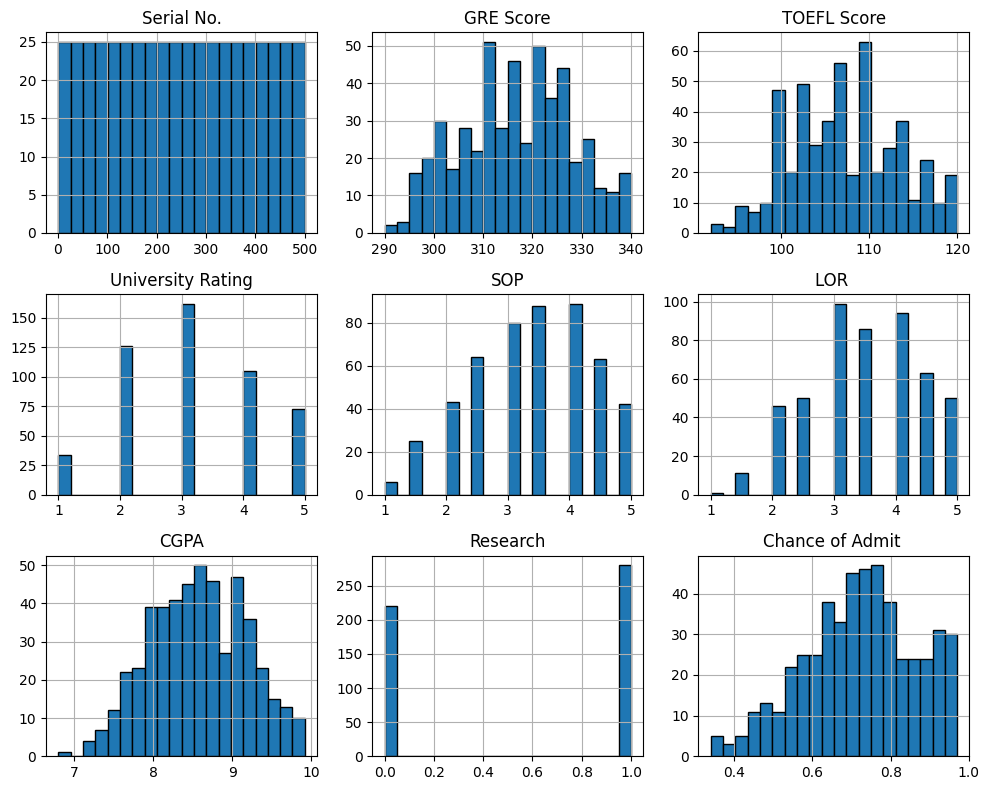

In [5]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


# Data cleaning and transformation

In [6]:
df = df.dropna()

df["Admitted"] = (df["Chance of Admit "] >= 0.5).astype(int)

X = df.drop(columns=["Serial No.", "Chance of Admit ", "Admitted"])
y = df["Admitted"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Splliting into train and test data 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and prediction

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)